In [2]:
# 3.1 Loading the IMDB dataset

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
# 3.2 Encoding the integer sequences into a binary matrix

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
# 3.3 The model definition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# 3.4 Compiling the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# 3.4.4 Validating your approach
# Creating a validation set by setting apart 10,0000 samples from the original trainign data

# 3.7 Setting aside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 24000 samples, validate on 1000 samples
Epoch 1/20
24000/24000 [==============================] - 4s 185us/step - loss: 0.4484 - acc: 0.8212 - val_loss: 0.3151 - val_acc: 0.8770
Epoch 2/20
24000/24000 [==============================] - 2s 84us/step - loss: 0.2592 - acc: 0.9086 - val_loss: 0.2602 - val_acc: 0.8870
Epoch 3/20
24000/24000 [==============================] - 2s 63us/step - loss: 0.1987 - acc: 0.9300 - val_loss: 0.2502 - val_acc: 0.8880
Epoch 4/20
24000/24000 [==============================] - 1s 58us/step - loss: 0.1661 - acc: 0.9413 - val_loss: 0.2558 - val_acc: 0.8890
Epoch 5/20
24000/24000 [==============================] - 2s 64us/step - loss: 0.1408 - acc: 0.9513 - val_loss: 0.2650 - val_acc: 0.8900
Epoch 6/20
24000/24000 [==============================] - 2s 73us/step - loss: 0.1203 - acc: 0.9592 - val_loss: 0.2817 - val_acc: 0.8950
Epoch 7/20
24000/24000 [==============================] - 1s 52us/step - loss: 0.1020 - acc: 0.9662 - val_loss: 0.3014 - val_acc

In [13]:
# 3.8 Training your model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.0148 - acc: 0.9961 - val_loss: 0.0734 - val_acc: 0.9875
Epoch 2/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0760 - val_acc: 0.9871
Epoch 3/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.0065 - acc: 0.9979 - val_loss: 0.0811 - val_acc: 0.9861
Epoch 4/20
15000/15000 [==============================] - 1s 75us/step - loss: 8.9865e-04 - acc: 1.0000 - val_loss: 0.0853 - val_acc: 0.9852
Epoch 5/20
15000/15000 [==============================] - 1s 77us/step - loss: 6.8278e-04 - acc: 1.0000 - val_loss: 0.0923 - val_acc: 0.9840
Epoch 6/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.0043 - acc: 0.9988 - val_loss: 0.0994 - val_acc: 0.9816
Epoch 7/20
15000/15000 [==============================] - 1s 76us/step - loss: 3.2406e-04 - acc: 1.0000 - val_loss: 0.1

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [15]:
# 3.10 Ploting the training and validation less

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

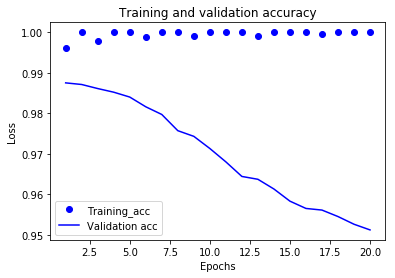

In [16]:
# Lisitng 3.10 Plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training_acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
# 3.11 Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.4526 - acc: 0.8195
Epoch 2/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.2586 - acc: 0.9104
Epoch 3/4
25000/25000 [==============================] - 1s 50us/step - loss: 0.1990 - acc: 0.9294
Epoch 4/4
25000/25000 [==============================] - 3s 139us/step


In [18]:
results

model.predict(x_test)

array([[0.17515542],
       [0.99982244],
       [0.8037203 ],
       ...,
       [0.11588231],
       [0.05290081],
       [0.59750694]], dtype=float32)

In [19]:
results

[0.2980814848423004, 0.88172]